# K- Means Clustering Algorithm

In [27]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)


from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')


from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_rand_score

Read in the 3 CSV files

In [3]:
base_df = pd.read_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\analytical_base_table.csv', index_col=0)

threshold_item_data = pd.read_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\threshold_item_data.csv', index_col=0)

pca_item_data = pd.read_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\pca_item_data.csv', index_col=0)

features chosen to input into the algorithm heavily influence the clusters created...Trying:

> Only purchase pattern features ("Base DF")

> Purchase pattern features + item features chosen by thresholding ("Threshold DF")

> Purchase pattern features + principal component features from items ("PCA DF")

In [4]:
print( 'base_df:', base_df.shape )
print( 'threshold_item_data:', threshold_item_data.shape )
print( 'pca_item_data:', pca_item_data.shape )

base_df: (414, 8)
threshold_item_data: (414, 20)
pca_item_data: (414, 125)


###### creating a threshold_df by joining the base_df with threshold_item_data

In [5]:
threshold_df = base_df.join(threshold_item_data)
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,0,1,0,0,2,0,5


###### Creating pca_df by joining base_df with pca_item_data

In [6]:
pca_df = base_df.join(pca_item_data)
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876143,4.828939,...,0.015766,0.186918,0.518042,0.179653,0.146852,0.991325,-0.191077,0.071199,-0.030373,-0.372192
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219848,1.226256,...,2.548724,-0.037701,0.109399,-0.466872,0.039144,-0.534724,1.037625,1.083158,-0.456615,1.390746
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260842,2.387646,...,-4.281430,0.964036,2.182912,-1.465909,-0.960800,4.612621,-3.253815,-4.639689,-0.736980,-3.884335
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929322,-0.714839,...,1.557563,-0.044741,0.141330,0.068160,-0.844800,-0.752321,-0.886980,0.189734,1.097079,0.131325
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.053105,2.111025,...,7.128004,2.529175,-4.933739,0.326323,-0.596089,3.395816,2.737637,-1.283518,-0.018944,5.557234


### 1. Considering 'Base DF' as the first set of features for clustering

 Let's say the client, the online gift retailer, employs 3 customer service reps, and wants to assign one cluster to each rep.
 Therefore I am going to set the number of clusters to 3

In [7]:
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [10]:
k_means = make_pipeline(StandardScaler(),KMeans(n_clusters=3, random_state=123))

In [12]:
k_means.fit(base_df)

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [13]:
base_df['cluster'] = k_means.predict(base_df)

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [14]:
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,1
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


###### Plotting scatterplot of total sales vs. average cart value, and color the points by cluster.

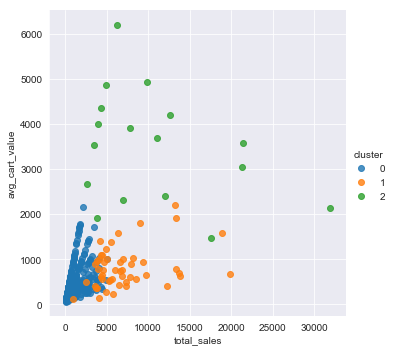

In [15]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=base_df, fit_reg=False)
plt.show()

### 2. Considering 'Threshold DF' as the second set of features for clustering

In [16]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [17]:
k_means.fit(threshold_df)

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [18]:
threshold_df['cluster'] = k_means.predict(threshold_df)
threshold_df.head()

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5,2


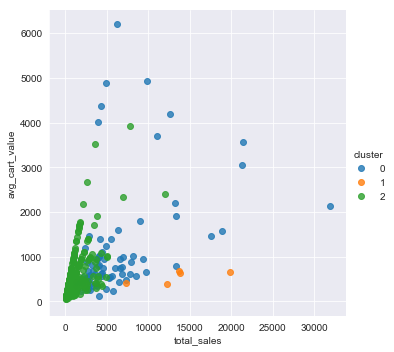

In [19]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)
plt.show()

### 3. Considering 'PCA DF' as the third set of features for clustering

In [20]:
k_means = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))
k_means.fit(pca_df)

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0))])

In [21]:
pca_df['cluster'] = k_means.predict(pca_df)
pca_df.head()

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876143,4.828939,-0.495539,3.093843,-0.633766,-11.534105,2.161996,7.117049,5.336088,4.424445,4.636863,2.316525,12.310489,1.986614,-11.431172,5.617879,-2.177303,7.665900,-12.135780,-16.049024,-5.949558,7.813699,40.517852,-35.576528,-17.557139,6.871311,20.885213,2.296090,-26.158313,-32.580721,7.883451,12.357731,6.827979,-32.957106,-4.401086,-17.241513,-11.274284,-14.484447,-2.765498,4.741846,-6.981413,-1.470543,...,2.542504,-1.037424,-1.695226,-1.865737,1.252494,0.483867,-1.360120,-2.192800,-3.544069,0.440890,-2.021701,0.432976,0.301805,1.152574,-1.998654,0.341165,0.501707,-0.196120,0.470349,-0.774897,-0.780191,-0.070769,0.209395,-0.073929,-1.228844,-0.377562,-1.105840,0.143241,0.494132,0.216092,-0.519854,-1.158772,-1.014214,0.303598,0.618119,0.681728,0.739675,0.528379,0.337376,0.015766,0.186918,0.518042,0.179653,0.146852,0.991325,-0.191077,0.071199,-0.030373,-0.372192,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219848,1.226256,-1.882030,-0.174184,0.817993,1.160799,-0.871792,-0.846361,0.460747,0.854278,-0.402563,0.981631,-1.104654,0.770658,-0.093540,-0.312786,-0.447952,1.206894,0.382737,-0.469562,0.184119,0.052817,0.498841,0.372724,1.225110,-0.773002,-0.269983,0.851526,-0.372271,-0.576563,1.013188,-0.579983,0.947624,-0.736052,0.355431,-0.388675,-0.300498,0.390347,0.153555,0.328564,-0.469241,0.703062,...,-0.934006,-0.493265,-0.354093,-0.296773,-0.001522,-0.684608,-0.288711,0.756771,0.112502,0.244329,-0.056577,-2.050545,-0.413470,-0.353261,-1.063864,-0.146145,1.143562,-0.444852,0.719717,-1.165818,0.496257,1.711301,0.775681,0.668936,1.174420,1.073476,-1.035425,-0.666613,0.759116,1.541853,-0.801077,0.057445,2.451206,-0.263822,-0.122360,-1.564763,-0.522741,-1.128166,-1.231214,2.548724,-0.037701,0.109399,-0.466872,0.039144,-0.534724,1.037625,1.083158,-0.456615,1.390746,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260842,2.387646,-0.073173,-1.118978,-0.034734,-3.715386,-0.343614,-0.148532,-0.789656,-0.379136,1.570487,0.182851,0.223808,-0.050876,3.178291,-0.512307,-1.841168,0.382440,0.316475,-0.000740,-0.423433,0.457804,-0.788313,1.745987,-1.481177,0.753959,-0.911272,0.774898,0.502965,-1.352556,0.281973,0.672566,0.078134,-0.216894,-0.664034,-1.535500,0.776339,-1.417875,-0.093956,-0.917749,0.098979,-0.097661,...,-0.799831,1.713876,0.500390,1.046377,-0.016537,-1.235001,0.842689,1.362108,-0.434998,1.610826,1.139239,-1.753703,-2.835106,1.023549,-2.196754,-1.606318,-2.759951,-1.197755,-0.855924,0.523701,-0.387473,2.092506,0.037504,-1.470818,-1.223641,0.679377,2.062584,3.710943,-1.980879,2.090788,0.818177,-1.186676,2.497014,-2.637434,-1.656170,-1.090740,0.006160,0.942665,-0.038280,-4.281430,0.964036,2.182912,-1.465909,-0.960800,4.612621,-3.253815,-4.639689,-0.736980,-3.884335,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929322,-0.714839,-1.580967,-0.469799,-0.116446,0.647823,0.113137,-1.336039,1.547084,-1.190291,-0.212795,1.056886,-0.474871,0.856248,-1.305630,0.243004,0.268050,1.952219,-0.228356,0.570002,-0.186411,0.902526,1.363931,0.177001,-0.258163,-0.167878,-0.681215,1.078430,-0.155415,-0.398397,0.240186,0.633905,-1.445107,-0.187308,-0.315448,-0.307001,-1.359204,-0.004938,0.580457,-0.246569,0.586602,-0.225486,...

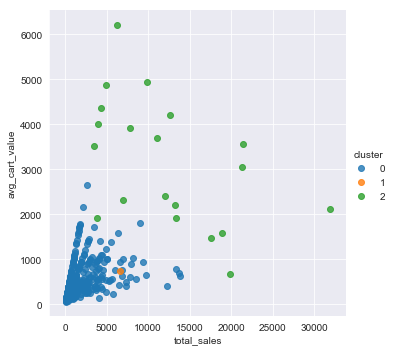

In [22]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)
plt.show()

In [24]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6021354951782343

In [25]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.40522220474779586

In [26]:
# Similary between threshold_df.cluster and pca_df.cluster
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.19060573398462136